# quant-econ Solutions: Types and Methods

Solutions for http://quant-econ.net/jl/julia_types_methods.html

## Exercise 1

Let's start with the AR1 definition as specified in the lecture

In [1]:
using Distributions

type AR1
    a::Real
    b::Real
    sigma::Real
    phi::Distribution
end

Now let's write the function to simulate AR1s

In [2]:
function simulate(m::AR1, n::Integer, x0::Real)
    X = Array(Float64, n)
    X[1] = x0
    for t in 1:(n-1)
        X[t+1] = m.a * X[t] + m.b + rand(m.phi)
    end
    return X
end

simulate (generic function with 1 method)

Let's test it out on the AR(1) process discussed in the lecture

In [3]:
m = AR1(0.9, 1, 1, Beta(5, 5))

AR1(0.9,1,1,Distributions.Beta(α=5.0, β=5.0))

In [4]:
X = simulate(m, 100, 0.0)

100-element Array{Float64,1}:
  0.0    
  1.64943
  3.17823
  4.34763
  5.29622
  6.32479
  7.18724
  8.09354
  8.86893
  9.59507
  9.9789 
 10.5312 
 10.8955 
  ⋮      
 15.2944 
 15.233  
 14.9905 
 14.7978 
 14.727  
 14.6916 
 14.8954 
 14.7177 
 14.4729 
 14.8052 
 14.8502 
 14.9667 

Next let's plot the time series to see what it looks like

In [5]:
using PyPlot

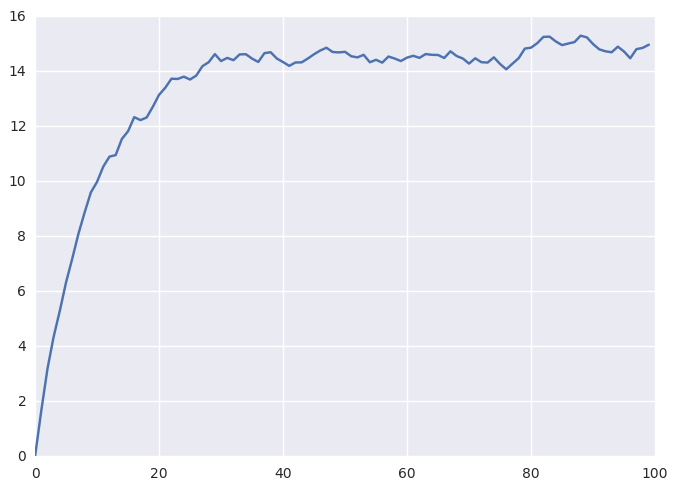

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31c6751d0>

In [7]:
plot(X)

## Exercise 2

Here's the function to act on integers

In [8]:
function f(k::Integer)
    @assert k > 0 "k must be a natural number"
    z = randn(k)
    return sum(z.^2)
end

f (generic function with 1 method)

Let's test it

In [9]:
f(3)

3.873001992280151

Calls with non-integer arguments will raise a "no matching method" error

In [10]:
f(3.5)

LoadError: LoadError: MethodError: `f` has no method matching f(::Float64)
while loading In[10], in expression starting on line 1

Calls with integers less than 1 will trigger an assertion failure inside the function body

In [11]:
f(-2)

LoadError: LoadError: AssertionError: k must be a natural number
while loading In[11], in expression starting on line 1

Now let's add the version that works on vectors.  The notation we'll use is slightly different to what we saw in the lectures.  We are using parametric types to indicate that ``f`` will act on vectors of the form ``Array{T, 1}`` where ``T`` is a subtype ``Integer``

In [12]:
function f{T <: Integer}(k_vec::Array{T, 1})
    for k in k_vec
        @assert k > 0 "Each integer must be a natural number"
    end
    n = length(k_vec)
    draws = Array(Float64, n)
    for i in 1:n
        z = randn(k_vec[i])
        draws[i] = sum(z.^2)
    end
    return draws
end

f (generic function with 2 methods)

Let's test it

In [13]:
f([2, 4, 6])

3-element Array{Float64,1}:
 1.76157
 1.1328 
 2.26623

The first version of ``f`` continues to work as before when we call it on scalars

In [14]:
f(2)

1.507000962182262

In [15]:
@which(f(2))

f(k::Integer) at In[8]:2

In [16]:
@which(f([2, 3]))

f{T<:Integer}(k_vec::Array{T<:Integer,1}) at In[12]:2